## 날짜, 시간 자료형, 도구

In [1]:
from datetime import datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2020, 7, 22, 10, 56, 5, 247403)

In [6]:
now.year, now.month, now.day

(2020, 7, 22)

In [8]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [9]:
delta.days

926

In [10]:
delta.seconds

56700

In [11]:
from datetime import timedelta

In [13]:
start = datetime(2011,1,7)
start + timedelta(12) # 날짜 더하기

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 문자열을 datetime으로 변환하기

In [16]:
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [19]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [21]:
from dateutil.parser import parse

parse('2011-01-03') # 날짜형식을 입할 필요가 없다.

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [23]:
parse('6/12/2011',dayfirst=True) # 날짜값이 처음에 올 때

datetime.datetime(2011, 12, 6, 0, 0)

In [25]:
datestrs=['2011-07-06 12:00:00', '2011-08-06 00:00:00']

import pandas as pd

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [28]:
idx = pd.to_datetime(datestrs + [None])
idx,idx[2]

(DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None),
 NaT)

In [31]:
pd.isna(idx)

array([False, False,  True])

## 시계열 기초

In [34]:
from datetime import datetime
import numpy as np

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.240034
2011-01-05   -0.565562
2011-01-07   -0.616699
2011-01-08    0.779044
2011-01-10   -0.799069
2011-01-12    0.368100
dtype: float64

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [36]:
ts + ts[::2] # 0,2,4번째만 있기 때문에 나머지는 NA

2011-01-02   -0.480068
2011-01-05         NaN
2011-01-07   -1.233398
2011-01-08         NaN
2011-01-10   -1.598139
2011-01-12         NaN
dtype: float64

In [38]:
ts.index.dtype

dtype('<M8[ns]')

In [40]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### index, select, subsetting

In [43]:
stamp = ts.index[2]
ts[stamp]

-0.6166991750970028

In [44]:
ts['1/10/2011']

-0.7990694775626129

In [45]:
ts['20110110']

-0.7990694775626129

In [47]:
longer_ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01   -0.612792
2000-01-02    0.181901
2000-01-03   -0.530800
2000-01-04    1.643909
2000-01-05   -1.030336
                ...   
2002-09-22   -0.876137
2002-09-23    0.495515
2002-09-24    0.200692
2002-09-25    1.202815
2002-09-26   -1.263621
Freq: D, Length: 1000, dtype: float64

In [48]:
longer_ts['2001']

2001-01-01    1.097151
2001-01-02    0.799911
2001-01-03    0.318312
2001-01-04    0.295103
2001-01-05   -1.062905
                ...   
2001-12-27   -0.833505
2001-12-28    0.165334
2001-12-29   -0.975445
2001-12-30   -0.072397
2001-12-31    1.115985
Freq: D, Length: 365, dtype: float64

In [49]:
longer_ts['2001-05']

2001-05-01   -2.527958
2001-05-02    0.791710
2001-05-03    0.724417
2001-05-04    0.308114
2001-05-05   -0.080375
2001-05-06    1.726262
2001-05-07    0.348398
2001-05-08   -1.361451
2001-05-09   -0.503738
2001-05-10    0.497964
2001-05-11    0.676508
2001-05-12   -0.386590
2001-05-13   -0.653842
2001-05-14    0.721815
2001-05-15    0.115624
2001-05-16   -1.027868
2001-05-17   -0.586328
2001-05-18    0.752546
2001-05-19    0.010417
2001-05-20    0.208181
2001-05-21   -0.595305
2001-05-22    0.144176
2001-05-23    0.502239
2001-05-24   -2.161082
2001-05-25   -0.446119
2001-05-26    1.199214
2001-05-27   -1.346460
2001-05-28   -0.521109
2001-05-29    0.492873
2001-05-30   -1.785715
2001-05-31   -0.739188
Freq: D, dtype: float64

In [51]:
ts[datetime(2011,1,7):]

2011-01-07   -0.616699
2011-01-08    0.779044
2011-01-10   -0.799069
2011-01-12    0.368100
dtype: float64

In [53]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.616699
2011-01-08    0.779044
2011-01-10   -0.799069
dtype: float64

In [54]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.240034
2011-01-05   -0.565562
2011-01-07   -0.616699
2011-01-08    0.779044
dtype: float64

In [56]:
dates = pd.date_range('1/1/2000',periods=100, freq='W-WED') # 수요일만 찾기
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [58]:
long_df = pd.DataFrame(np.random.randn(100,4),index=dates,columns=['colorado','texas','new york','ohio'])
long_df

,colorado,texas,new york,ohio
2000-01-05,1.293659,-3.118481,0.654779,0.235927
2000-01-12,-0.770634,-0.266114,0.377579,0.507836
2000-01-19,1.349895,-1.104632,0.679306,-0.916665
2000-01-26,0.571491,-0.584147,-0.390982,-0.341205
2000-02-02,-0.832133,1.700541,-0.605382,-1.221119
...,...,...,...,...
2001-10-31,1.821414,-1.005988,0.869687,-0.703831
2001-11-07,-0.669388,-0.737375,-0.692569,0.814953
2001-11-14,0.369454,-0.458247,-0.414335,0.939190
2001-11-21,-0.502035,-1.213597,0.734337,-1.584842


### 중복 index

In [59]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [60]:
dup_ts.index.is_unique # index 중복여부 판단하기

False

In [61]:
dup_ts['1/3/2000']

4

In [62]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [66]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [67]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 날짜 범위, 빈도, 이동

In [68]:
ts

2011-01-02   -0.240034
2011-01-05   -0.565562
2011-01-07   -0.616699
2011-01-08    0.779044
2011-01-10   -0.799069
2011-01-12    0.368100
dtype: float64

In [69]:
resampler = ts.resample('D') # 일 단위 빈도

### 날짜 범위 생성하기

In [70]:
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [71]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [96]:
last_date = pd.date_range('2000-01-01','2000-12-01',freq='BM') # 월별 마지막 평일

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [97]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [98]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 빈도와 날짜 오프셋

In [99]:
from pandas.tseries.offsets import Hour,Minute

In [101]:
hour = Hour()

hour

<Hour>

In [103]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [104]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [105]:
Hour(2)+Minute(30)

<150 * Minutes>

In [106]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [109]:
# 월별 주차
rng = pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 데이터 시프트

In [110]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))

In [111]:
ts

2000-01-31   -0.029353
2000-02-29   -0.679201
2000-03-31    0.545958
2000-04-30   -1.317635
Freq: M, dtype: float64

In [112]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.029353
2000-04-30   -0.679201
Freq: M, dtype: float64

In [113]:
ts.shift(-2)

2000-01-31    0.545958
2000-02-29   -1.317635
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [116]:
(ts/ts.shift(1)) -1

2000-01-31          NaN
2000-02-29    22.139049
2000-03-31    -1.803824
2000-04-30    -3.413436
Freq: M, dtype: float64

In [117]:
ts.shift(2, freq='M')

2000-03-31   -0.029353
2000-04-30   -0.679201
2000-05-31    0.545958
2000-06-30   -1.317635
Freq: M, dtype: float64

In [118]:
ts.shift(3,freq='D')

2000-02-03   -0.029353
2000-03-03   -0.679201
2000-04-03    0.545958
2000-05-03   -1.317635
dtype: float64

In [119]:
from pandas.tseries.offsets import Day, MonthEnd

In [120]:
now = datetime(2011,11,17)

In [121]:
now + 3*Day()

Timestamp('2011-11-20 00:00:00')

In [122]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [125]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [126]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [127]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [130]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000',periods=20, freq='4d'))
ts

2000-01-15   -0.514065
2000-01-19    1.513966
2000-01-23    0.558901
2000-01-27   -0.433788
2000-01-31   -1.589382
2000-02-04    1.381635
2000-02-08    0.232836
2000-02-12    0.352577
2000-02-16   -0.338825
2000-02-20    0.115007
2000-02-24   -0.616034
2000-02-28    0.036857
2000-03-03    0.540032
2000-03-07   -1.879046
2000-03-11   -0.400752
2000-03-15    1.196816
2000-03-19    0.096540
2000-03-23   -2.800944
2000-03-27   -0.808396
2000-03-31   -0.211027
Freq: 4D, dtype: float64

In [132]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.092874
2000-02-29    0.166293
2000-03-31   -0.533347
dtype: float64

In [133]:
ts.resample('M').mean()

2000-01-31   -0.092874
2000-02-29    0.166293
2000-03-31   -0.533347
Freq: M, dtype: float64

## 시간대 다루기

In [141]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [145]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [144]:
tz_k = pytz.timezone('Asia/seoul')
tz_k

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

### 시간대 지역화와 변환

In [150]:
rng = pd.date_range('3/9/2012 9:30',periods=6,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -0.919806
2012-03-10 09:30:00    1.088649
2012-03-11 09:30:00   -0.505771
2012-03-12 09:30:00    1.651830
2012-03-13 09:30:00    0.131727
2012-03-14 09:30:00    0.784766
Freq: D, dtype: float64

In [153]:
print(ts.index.tz)

None


In [154]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [155]:
ts

2012-03-09 09:30:00   -0.919806
2012-03-10 09:30:00    1.088649
2012-03-11 09:30:00   -0.505771
2012-03-12 09:30:00    1.651830
2012-03-13 09:30:00    0.131727
2012-03-14 09:30:00    0.784766
Freq: D, dtype: float64

In [157]:
ts_utc = ts.tz_localize('UTC') # utc 그리니치 천문대 시간
ts_utc

2012-03-09 09:30:00+00:00   -0.919806
2012-03-10 09:30:00+00:00    1.088649
2012-03-11 09:30:00+00:00   -0.505771
2012-03-12 09:30:00+00:00    1.651830
2012-03-13 09:30:00+00:00    0.131727
2012-03-14 09:30:00+00:00    0.784766
Freq: D, dtype: float64

In [158]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [159]:
ts_utc.tz_convert('Asia/Seoul')

2012-03-09 18:30:00+09:00   -0.919806
2012-03-10 18:30:00+09:00    1.088649
2012-03-11 18:30:00+09:00   -0.505771
2012-03-12 18:30:00+09:00    1.651830
2012-03-13 18:30:00+09:00    0.131727
2012-03-14 18:30:00+09:00    0.784766
Freq: D, dtype: float64

### 시간대를 고려해서 Timestamp 객체 다루기

In [162]:
stamp = pd.Timestamp('2011-03-12 04:00')

stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2011-03-12 13:00:00+0900', tz='Asia/Seoul')

In [164]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [165]:
stamp_utc.value # 1970년 1월 1일부터 nano초단위로 기록

1299902400000000000

In [166]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [167]:
stamp = pd.Timestamp('2012-03-12 01:30',tz='US/Eastern')
stamp                

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [168]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [169]:
stamp = pd.Timestamp('2012-11-04', tz='US/Eastern')

stamp + 2*Hour() # DTS 썸마타임

Timestamp('2012-11-04 01:00:00-0500', tz='US/Eastern')

### 다른 시간대 간의 연산

In [173]:
rng = pd.date_range('3/7/2012 9:30',periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)),index=rng)

ts

2012-03-07 09:30:00    1.739321
2012-03-08 09:30:00    0.729932
2012-03-09 09:30:00    0.964687
2012-03-12 09:30:00   -0.129070
2012-03-13 09:30:00   -1.364277
2012-03-14 09:30:00    0.384529
2012-03-15 09:30:00   -1.350211
2012-03-16 09:30:00   -0.644114
2012-03-19 09:30:00   -0.400872
2012-03-20 09:30:00    0.245210
Freq: B, dtype: float64

In [178]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

result = ts1 + ts2

In [180]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.929374
2012-03-12 09:30:00+00:00   -0.258141
2012-03-13 09:30:00+00:00   -2.728553
2012-03-14 09:30:00+00:00    0.769058
2012-03-15 09:30:00+00:00   -2.700423
Freq: B, dtype: float64

In [181]:
result.index # utc 시간 기준으로 합산해준다.

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 기간과 기간 연산

In [186]:
p = pd.Period(2007,freq='A-DEC') # 해당연도 1/1 부터 12/31까지를 나타냄
p

Period('2007', 'A-DEC')

In [187]:
pd.Period('2014',freq='A-DEC') -p

<7 * YearEnds: month=12>

In [189]:
rng =  pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [190]:
pd.Series(np.random.randn(6),index=rng)

2000-01    0.062269
2000-02    1.141092
2000-03    0.077917
2000-04   -1.334152
2000-05   -0.867290
2000-06   -0.465869
Freq: M, dtype: float64

In [192]:
values = ['2001Q3','2002Q2','2003Q1'] # 문자열을 이용한 기간 설정

index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### period의 빈도 변환

In [193]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [196]:
p.asfreq('M', how='start') # 빈도 변환 Y -> M

Period('2007-01', 'M')

In [198]:
p = pd.Period('2007', freq='A-JUN') # 기준(마감) 월을 입력해준다.
p

Period('2007', 'A-JUN')

In [199]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [200]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [201]:
p.asfreq('A-JUN') # 년도 기준이 6월(끝) 이기때문에 07년 8월은 08년도로 들어간다.

Period('2008', 'A-JUN')

In [203]:
rng = pd.period_range('2006','2009',freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)),index=rng)

ts

2006   -0.111587
2007   -0.328708
2008   -1.029038
2009   -1.163944
Freq: A-DEC, dtype: float64

In [204]:
ts.asfreq('M',how='start')

2006-01   -0.111587
2007-01   -0.328708
2008-01   -1.029038
2009-01   -1.163944
Freq: M, dtype: float64

In [206]:
ts.asfreq('B', how='end') # 평일 기준

2006-12-29   -0.111587
2007-12-31   -0.328708
2008-12-31   -1.029038
2009-12-31   -1.163944
Freq: B, dtype: float64

### 분기 빈도

In [208]:
p = pd.Period('2012Q4',freq='Q-JAN') # 분기 기준이 달라진다. 
p

Period('2012Q4', 'Q-JAN')

In [209]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [210]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [213]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16*60 
p4pm

Period('2012-01-30 16:00', 'T')

In [214]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [217]:
rng = pd.period_range('2011Q3','2012Q4',freq='Q-JAN')

ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2011Q3    0.745770
2011Q4   -0.486692
2012Q1   -0.484428
2012Q2   -1.183364
2012Q3    0.404858
2012Q4    0.133676
Freq: Q-JAN, dtype: float64

In [220]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16*60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0.745770
2011-01-28 16:00:00   -0.486692
2011-04-28 16:00:00   -0.484428
2011-07-28 16:00:00   -1.183364
2011-10-28 16:00:00    0.404858
2012-01-30 16:00:00    0.133676
dtype: float64

### 타임스탬프와 기간 서로 변경하기

In [226]:
rng = pd.date_range('2000-01-01',periods=3,freq='M')

ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-31    1.314600
2000-02-29   -1.548016
2000-03-31   -0.939176
Freq: M, dtype: float64

In [228]:
pts = ts.to_period()
pts

2000-01    1.314600
2000-02   -1.548016
2000-03   -0.939176
Freq: M, dtype: float64

In [230]:
rng = pd.date_range('1/29/2000',periods=6,freq='D')

ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.503764
2000-01-30   -0.169745
2000-01-31   -0.590605
2000-02-01    0.815215
2000-02-02   -1.056020
2000-02-03    0.121227
Freq: D, dtype: float64

In [231]:
ts2.to_period('M')

2000-01    0.503764
2000-01   -0.169745
2000-01   -0.590605
2000-02    0.815215
2000-02   -1.056020
2000-02    0.121227
Freq: M, dtype: float64

In [233]:
pts = ts2.to_period()
pts

2000-01-29    0.503764
2000-01-30   -0.169745
2000-01-31   -0.590605
2000-02-01    0.815215
2000-02-02   -1.056020
2000-02-03    0.121227
Freq: D, dtype: float64

In [234]:
pts.to_timestamp(how='e')

2000-01-29 23:59:59.999999999    0.503764
2000-01-30 23:59:59.999999999   -0.169745
2000-01-31 23:59:59.999999999   -0.590605
2000-02-01 23:59:59.999999999    0.815215
2000-02-02 23:59:59.999999999   -1.056020
2000-02-03 23:59:59.999999999    0.121227
Freq: D, dtype: float64

### 배열로 PeriodIndex 생성하기

In [236]:
data = pd.read_csv('data/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [237]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [238]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [239]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [240]:
data.index = index

In [241]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [242]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 리샘플링과 빈도 변환

In [244]:
rng = pd.date_range('2000-01-01',periods=100, freq='D')

ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01    0.972973
2000-01-02    1.652990
2000-01-03   -0.364407
2000-01-04    0.067851
2000-01-05    1.234890
                ...   
2000-04-05    1.717703
2000-04-06   -0.048867
2000-04-07   -0.515257
2000-04-08    0.780976
2000-04-09   -0.857103
Freq: D, Length: 100, dtype: float64

In [245]:
ts.resample('M').mean()

2000-01-31    0.190261
2000-02-29    0.168299
2000-03-31    0.260024
2000-04-30    0.157466
Freq: M, dtype: float64

In [246]:
ts.resample('M',kind='period').mean()

2000-01    0.190261
2000-02    0.168299
2000-03    0.260024
2000-04    0.157466
Freq: M, dtype: float64

### 다운샘플링

In [251]:
rng = pd.date_range('2000-01-01',periods=12, freq='T')

ts = pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [253]:
ts.resample('5min').sum() # 기본으로 close = 'left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [255]:
ts.resample('5min',closed='right',label='right').sum() # 구간별 마지막 값을 라벨로 갖는다.

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [257]:
ts.resample('5min', closed='right',label='right',loffset='-1s').sum() # 명확하게 보기위해

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [258]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


###  업샘플링과 보간

In [261]:
frame = pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000', periods=2,freq='W-WED')
                   ,columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,3.303871,-0.089212,-0.582062,1.918941
2000-01-12,-0.617365,-0.370353,-1.679377,0.608000


In [263]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,3.303871,-0.089212,-0.582062,1.918941
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.617365,-0.370353,-1.679377,0.608000


In [264]:
frame.resample('D').ffill() # 다음 수요일이 오기전까지 전 값으로 채우기

,Colorado,Texas,New York,Ohio
2000-01-05,3.303871,-0.089212,-0.582062,1.918941
2000-01-06,3.303871,-0.089212,-0.582062,1.918941
2000-01-07,3.303871,-0.089212,-0.582062,1.918941
2000-01-08,3.303871,-0.089212,-0.582062,1.918941
2000-01-09,3.303871,-0.089212,-0.582062,1.918941
2000-01-10,3.303871,-0.089212,-0.582062,1.918941
2000-01-11,3.303871,-0.089212,-0.582062,1.918941
2000-01-12,-0.617365,-0.370353,-1.679377,0.608000


In [265]:
frame.resample('D').ffill(limit=2) # 2개만

,Colorado,Texas,New York,Ohio
2000-01-05,3.303871,-0.089212,-0.582062,1.918941
2000-01-06,3.303871,-0.089212,-0.582062,1.918941
2000-01-07,3.303871,-0.089212,-0.582062,1.918941
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.617365,-0.370353,-1.679377,0.608000


In [266]:
frame.resample('W-THU').ffill() # index가 달라져도 괜찮다.

,Colorado,Texas,New York,Ohio
2000-01-06,3.303871,-0.089212,-0.582062,1.918941
2000-01-13,-0.617365,-0.370353,-1.679377,0.608000


### 기간 리샘플링

In [267]:
frame = pd.DataFrame(np.random.randn(24, 4),index=pd.period_range('1-2000','12-2001',freq='M')
                    ,columns = ['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,0.106200,-0.306463,-1.263959,1.194105
2000-02,0.311774,0.928555,1.076149,-0.905722
2000-03,-0.485026,1.110709,0.962242,-0.485109
2000-04,-0.108577,-1.734704,0.135329,1.951152
2000-05,-0.078159,0.139459,1.828222,1.213723
2000-06,1.660083,-0.796872,0.779468,0.501517
2000-07,0.245714,-1.169019,-0.776985,0.183993
2000-08,0.879548,1.596307,-0.565125,-0.724812
2000-09,0.386755,-0.899544,0.583727,0.251619
2000-10,-0.816128,0.998886,-0.114006,0.624085


In [268]:
annual_frame = frame.resample('A-DEC').mean() # convention 값을 지정할 수 있다. start, end
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.037367,0.172778,0.376132,0.362598
2001,-0.038192,0.150423,-0.338565,0.065960


In [269]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.037367,0.172778,0.376132,0.362598
2000Q2,-0.037367,0.172778,0.376132,0.362598
2000Q3,-0.037367,0.172778,0.376132,0.362598
2000Q4,-0.037367,0.172778,0.376132,0.362598
2001Q1,-0.038192,0.150423,-0.338565,0.065960
2001Q2,-0.038192,0.150423,-0.338565,0.065960
2001Q3,-0.038192,0.150423,-0.338565,0.065960
2001Q4,-0.038192,0.150423,-0.338565,0.065960


In [270]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.037367,0.172778,0.376132,0.362598
2001Q1,-0.037367,0.172778,0.376132,0.362598
2001Q2,-0.037367,0.172778,0.376132,0.362598
2001Q3,-0.037367,0.172778,0.376132,0.362598
2001Q4,-0.038192,0.150423,-0.338565,0.065960


In [271]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.037367,0.172778,0.376132,0.362598
2001Q1,-0.037367,0.172778,0.376132,0.362598
2001Q2,-0.037367,0.172778,0.376132,0.362598
2001Q3,-0.037367,0.172778,0.376132,0.362598
2001Q4,-0.038192,0.150423,-0.338565,0.065960
2002Q1,-0.038192,0.150423,-0.338565,0.065960
2002Q2,-0.038192,0.150423,-0.338565,0.065960
2002Q3,-0.038192,0.150423,-0.338565,0.065960


## 이동창 함수

In [273]:
close_px_all = pd.read_csv('data/stock_px_2.csv',parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [274]:
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [276]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [279]:
import matplotlib.pylab as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


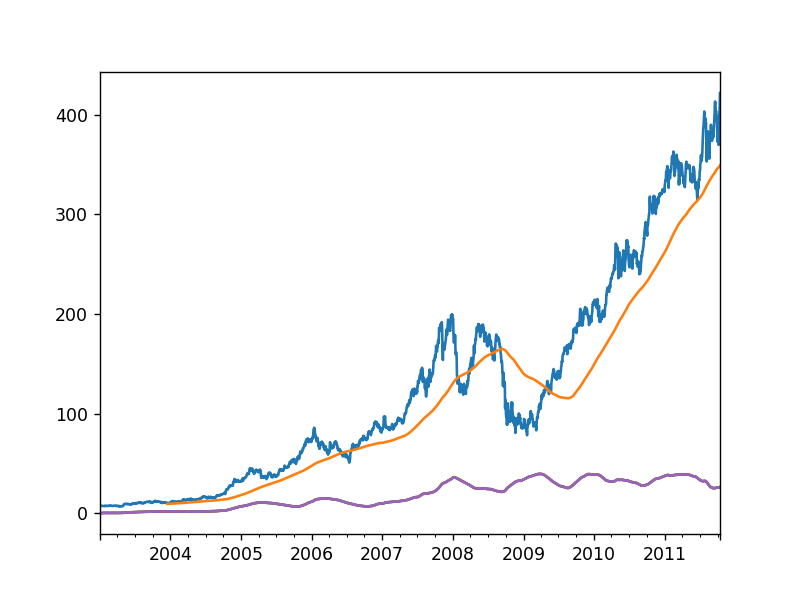

In [284]:
close_px.AAPL.plot()

close_px.AAPL.rolling(250).mean().plot()

In [286]:
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()

appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


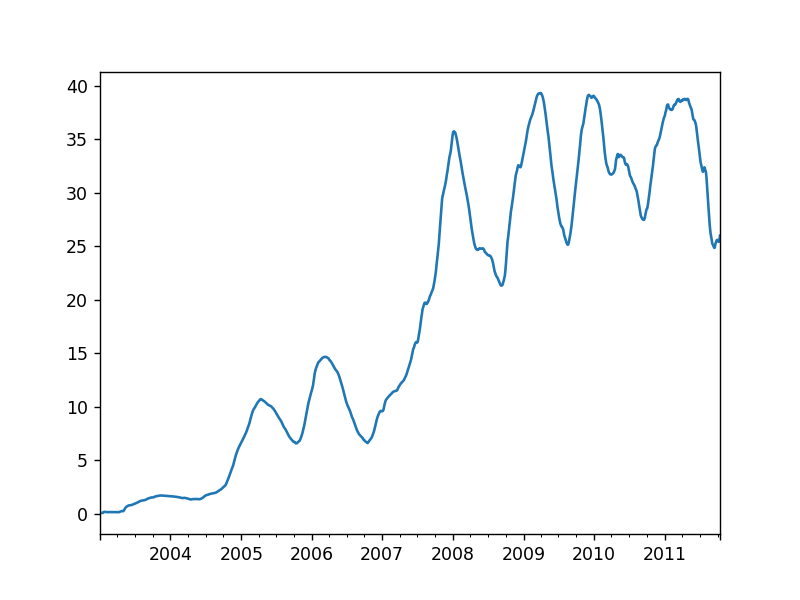

In [292]:
plt.figure()
appl_std250.plot()

<IPython.core.display.Javascript object>


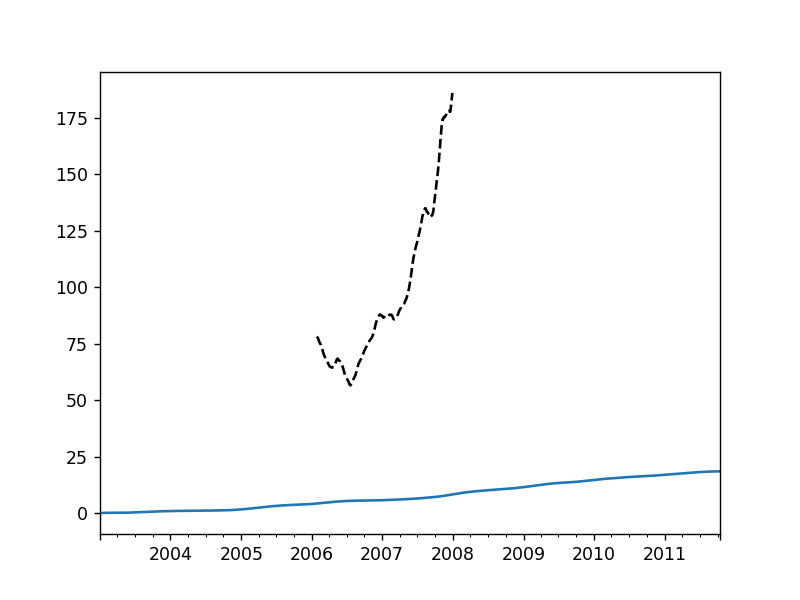

In [297]:
plt.figure()
expanding_mean = appl_std250.expanding().mean().plot()

<IPython.core.display.Javascript object>


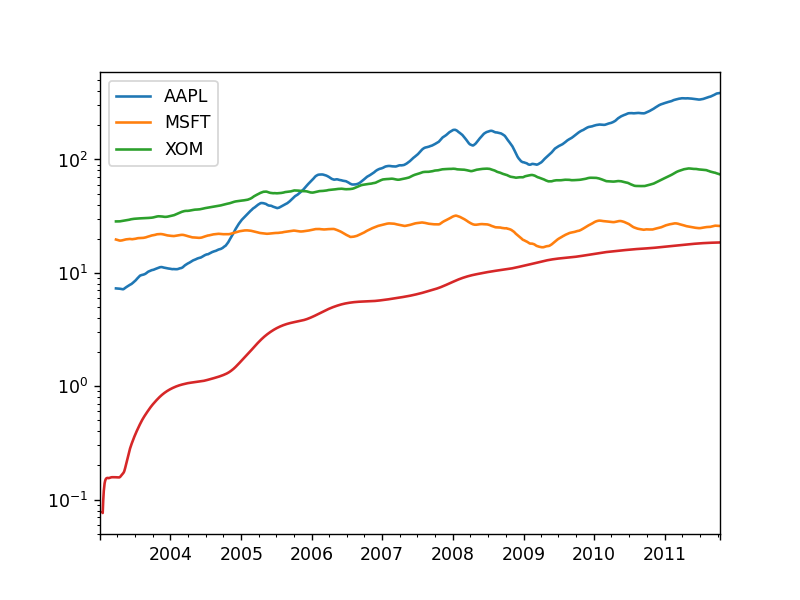

In [295]:
close_px.rolling(60).mean().plot(logy=True)

In [298]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 지수 가중 함수

In [301]:
appl_px = close_px.AAPL['2006':'2007']
appl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

<IPython.core.display.Javascript object>


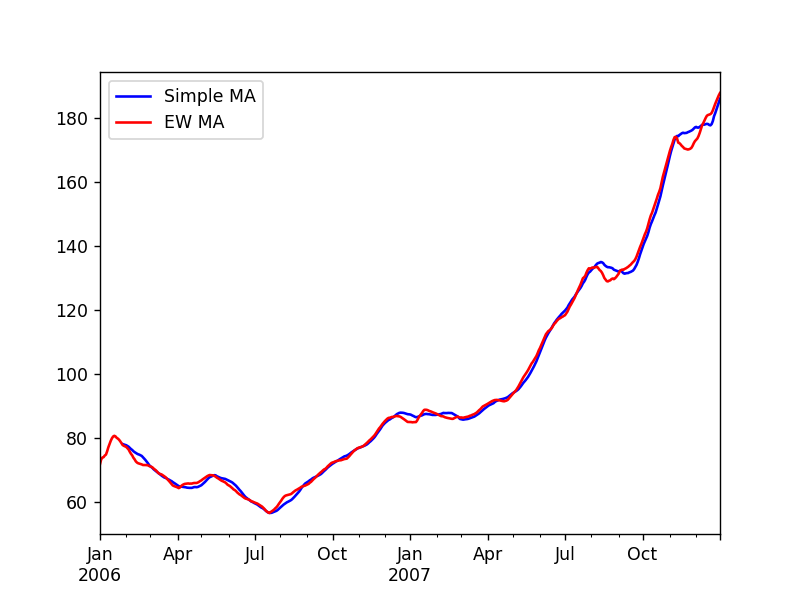

In [311]:
ma60 = appl_px.rolling(30,min_periods=20).mean()
ewma60 = appl_px.ewm(span=30).mean()

plt.figure()
ma60.plot(style='b-', label='Simple MA')
ewma60.plot(style='r-',label = 'EW MA')
plt.legend()

### 이진 이동창 함수

In [309]:
spx_px = close_px_all.SPX
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<IPython.core.display.Javascript object>


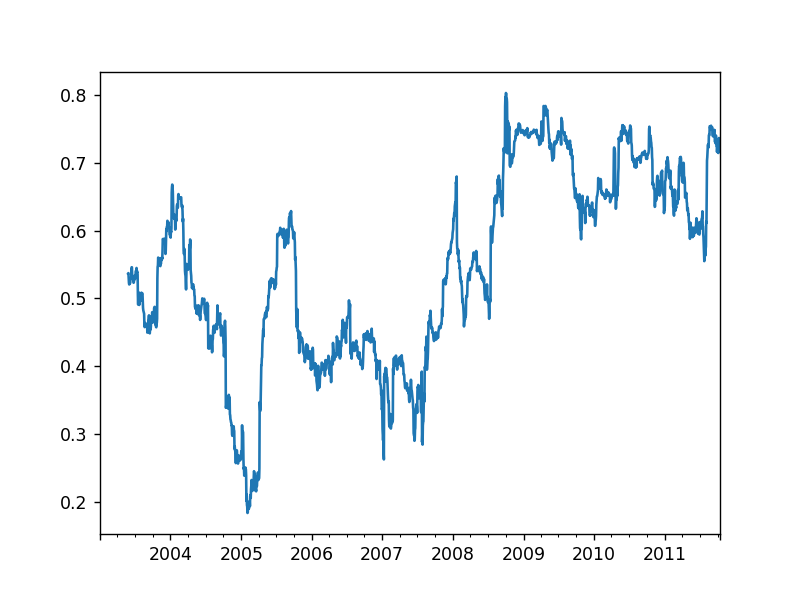

In [313]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
plt.figure()
corr.plot() # 6개월간 spx와 AAPL 수익 상관관계

<IPython.core.display.Javascript object>


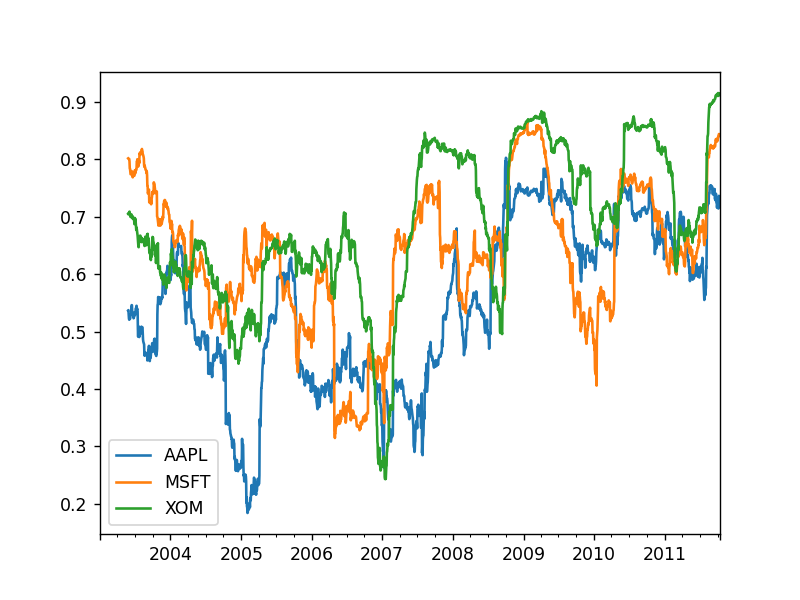

In [320]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 사용자 정의 이동창 함수

In [318]:
from scipy.stats import percentileofscore # 표본에서 특정값이 차지하는 비율을 알려주는 함수
# 하위 에서 퍼센테이지를 세어준다.

<IPython.core.display.Javascript object>


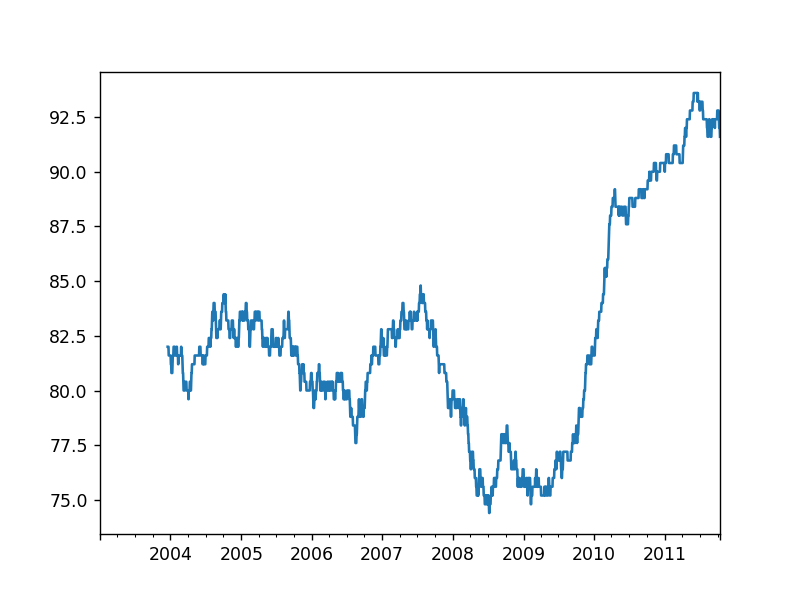

In [321]:
score_at_2percent = lambda x : percentileofscore(x,0.02) # 0.02값이 표본에서 하위 몇 퍼센트 인지 알려줌

result = returns.AAPL.rolling(250).apply(score_at_2percent)

plt.figure()
result.plot()